# Lab 5: More plotting with Seaborn

We will use the Lab 2 FBI NICS Firearms Background Check data, which records the number of background check made.  Recall a background check must be made prior to *some* sales of firearms (a big exception is private sales.)  This data is often used as the best approximation of total gun sales at a given time.

For more information on the dataset: [https://github.com/BuzzFeedNews/nics-firearm-background-checks](https://github.com/BuzzFeedNews/nics-firearm-background-checks)

For a direct link to the dataset:  [https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv](https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv)

If you are interested in gun laws, [this website](https://maps.everytownresearch.org/navigator/index.html) has some interactive information on how they have changed over time.

### Section 1: Loading and cleaning the data

Import the libraries and set all columns to be displayed:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

Read the data into the DataFrame `guns`:

In [3]:
guns=pd.read_csv("https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv")

Convert the `month` column into DataTime format.

In [4]:
guns['month'] = pd.to_datetime(guns['month'])

For the rest of the lab, we will only look at data from New York state.  Use a filter to create this DataFrame, called `ny_guns`, now.

In [7]:
ny_guns = guns[guns['state']=="New York"]

### Section 2:  Line plots

In this section, we will look at how to make line plots using Seaborn.  We can more easily make more complex line plots using Seaborn than using Pandas.  Recall a line plot shows how some quantity changes over time.

The following code plots a line plot of how the number of handgun background checks changed over time in New York state using Seaborn.

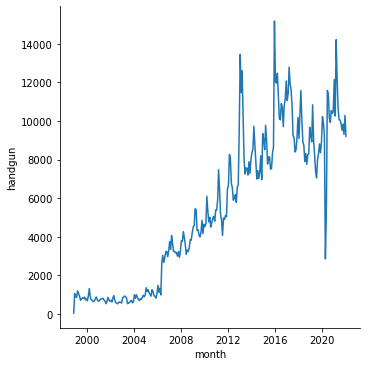

In [9]:
sns.relplot(x = "month", y = "handgun", kind = "line", data = ny_guns)

What is the trend in handgun background checks over time?  What happened to handgun background checks at the beginning of the pandemic?  Do you notice anything else interesting about the graph?

Plot the number of long gun background checks in New York state over time.

What kind of trends do you see in this graph?  How does it compare to the handgun graph?

Both plots show a lot of seasonal variation.  To see the overall trend over time, we can "smooth out" this seasonal variable by plotting the mean number of background checks for each year.

One way to do this would be by using `groupby()` first to compute the means.  However, Seaborn will do this computation automatically.  

First make a new column called `year` with just the year for each row.

In [18]:
ny_guns["year"] = ny_guns["month"].dt.year

<ipython-input-18-f94000368518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_guns["year"] = ny_guns["month"].dt.year


<details><summary>Answer:</summary>
    <code>
    ny_guns["year"] = ny_guns["month"].dt.year
    </code>
</details>

Next run the following code.

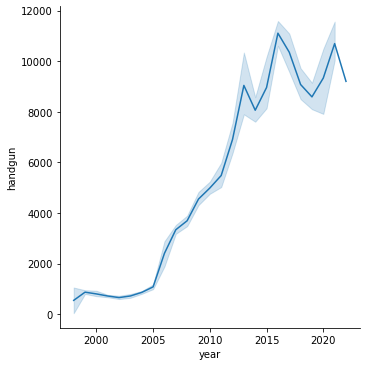

In [19]:
sns.relplot(x = "year", y = "handgun", kind = "line",data = ny_guns)

How does this plot compare to our previous handgun background check one?  Which one makes it easier to see the trend in background checks over time?  What do you think the shaded area is?

We have multiple measurements for each year value.  Seaborn plots the mean of these measurements as the line, and the shaded region around it is the 95% confidence interval.   

You can remove the shaded area with the parameter `ci = None`.  Try it below for the long gun background check data.

How do the long gun background checks compare to the handgun background checks?

### Section 3:  Wide vs. long data

It would be easier to answer this question if both lines were plotted on the same graph.  To do this, we need to change the format of our DataFrame from *wide* to *long*.

Our current DataFrame is *wide* because each of the types of background checks has it's own column, adding to the width of the DataFrame.  To make a *long* DataFrame, we are going instead make a single column stating the type of background check, and another column beside that one with the number of background checks.

We will simplify by only using the following columns.

The `other` category counts background checks for frames and receivers (both parts of guns), and other firearms that aren't handguns or long guns.

The `multiple` category counts background checks for more than one gun at a time.



In [22]:
cols_to_use = ["handgun","long_gun","other","multiple"]

The `melt()` function converts a DataFrame from the wide format to the long format.  

In [23]:
ny_guns_long = pd.melt(ny_guns, id_vars = ["month"], value_vars = cols_to_use)

Display `ny_guns_long`.  What do you notice about this new DataFrame?

Try making a line plot of the counts in `ny_guns_long`, where the x axis is `month`, the y axis is `value`, and the color (`hue` parameter) is `variable`.

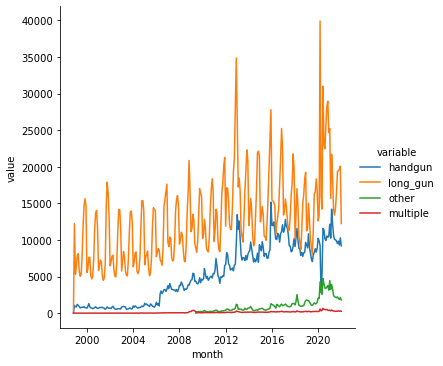

In [24]:
sns.relplot(x = "month", y = "value", hue = "variable", kind = "line", data = ny_guns_long)

<details><summary>Answer:</summary>
<code>
sns.relplot(x = "month", y = "value", hue = "variable", kind = "line", data = ny_guns_long)
</code>
</details>

How do the number of background checks for the different categories compare?

Can you figure out how to make a smoothed line plot that still shows all 4 categories?

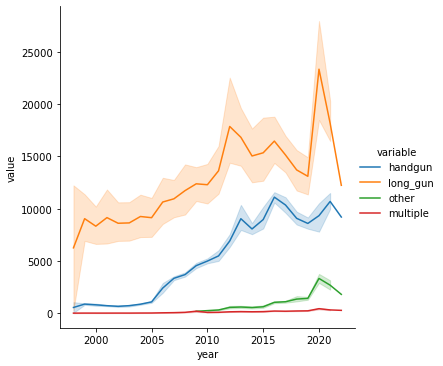

In [25]:
ny_guns_long["year"] = ny_guns_long["month"].dt.year
sns.relplot(x = "year", y = "value", hue = "variable", kind = "line", data = ny_guns_long)

<details><summary>Answer:</summary>
<code>
ny_guns_long["year"] = ny_guns_long["month"].dt.year
sns.relplot(x = "year", y = "value", hue = "variable", kind = "line", data = ny_guns_long)
</code>
</details>

Which plot do you think is more informative?  The smoothed one or the previous one?  What do you notice from the smoothed plot?

### Section 4: Bar and box plots

We can also create more sophisticated bar plots in Seaborn.  The following code creates a bar plot of the mean number of background checks performed for each category for each year.  We also increase the size of the figure and rotate the x axis labels by 45 degrees (what happens if we don't do this?).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016'),
  Text(19, 0, '2017'),
  Text(20, 0, '2018'),
  Text(21, 0, '2019'),
  Text(22, 0, '2020'),
  Text(23, 0, '2021'),
  Text(24, 0, '2022')])

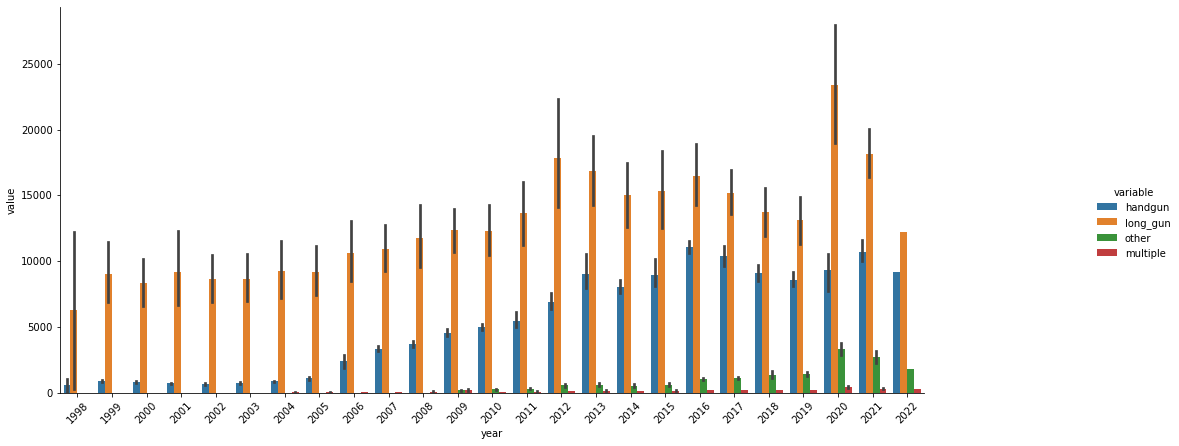

In [27]:
g=sns.catplot(x = "year", y = "value",hue = "variable", kind = "bar", data = ny_guns_long)
g.fig.set_size_inches(18,6)
plt.xticks(rotation=45)

What do you think the black lines are at the top of the bars?

A bar's height is the mean number of background check made each year for that category, and the black line at the top of each bar is the 95% confidence level for that mean.

This plot is presenting almost the same information as the last line plot.  Which do you prefer?  Which plot is easier to interpret?

If we want to see the distribution of background checks made each year, we need to use boxplots instead.


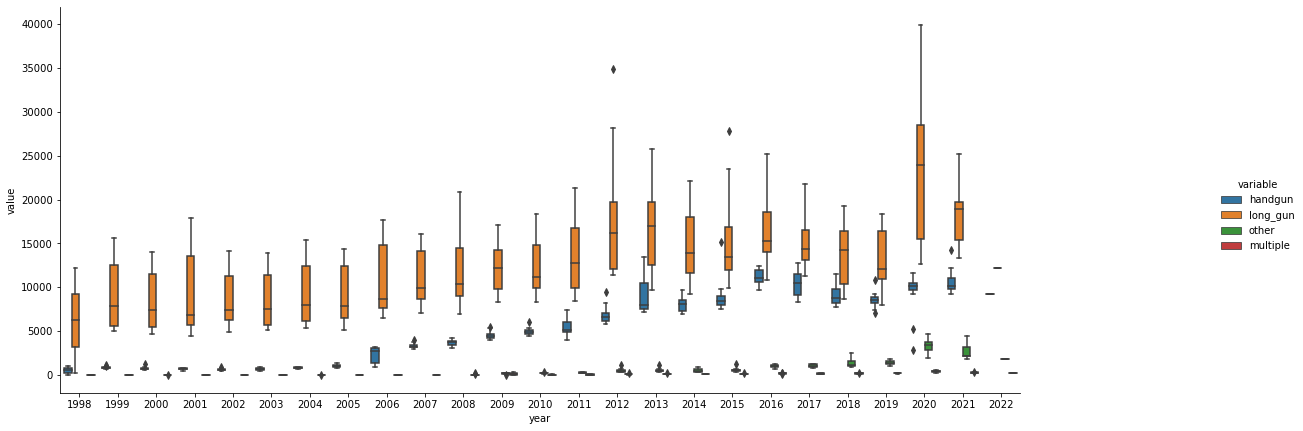

In [28]:
g = sns.catplot(x = "year", y = "value",hue = "variable", kind = "box", data = ny_guns_long)
g.fig.set_size_inches(20,6)

Even with making this plot wider, it is still quite hard to read.  Let's plot only the last 5 years.

First, use a filter to make a new DataFrame from `ny_guns_long` containing only the years 2015-2020, and then make a new boxplot using this DataFrame.

What do you notice about the distributions of the different categories?

### Section 5:  Scatterplot alternatives

A scatterplot visualizes a *bivariate distribution*, or a shared distribution between two variables.

Make a scatterplot in Seaborn using the New York data where the x axis is the number of handgun background checks, and the y axis is the number of long_gun background checks.

What do you notice about this scatterplot?  Can you tell which region contains the most number of data points?

When we make a scatterplot with a lot of data points, they can overlap so much that it is hard to tell where they are most concentrated.  We can smooth the data to show the density (where more data points are concentrated) instead of the individual data points.

First, let's make a scatterplot using a different Seaborn function.

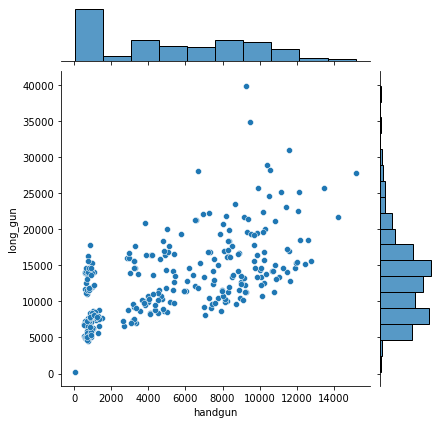

In [29]:
sns.jointplot(x = "handgun", y = "long_gun", data = ny_guns)

What do you think the histograms on the sides of the scatterplot are of?

To smooth the data points, add the parameter `kind = "kde"`.

What trend do we see between handgun and long_gun background checks?

This plot is smoothed using a mathematical technique called *kernel density estimation (kde)*.  In very simple terms, the smoothed point is computed by taking a weighted mean of neighboring points.  We are not covering kernel density estimation in MAT 328, but if you are interested in learning more about it, two references are:
- [kernel density estimation explained visually](https://mathisonian.github.io/kde/)
- [more in depth explanation of kernel density estimation](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html_

### Optional Challenge Questions:
- Above, we used Seaborn to compute the mean number of handgun background checks for each year and use those values to make a line plot.  Alternatively, we could use `groupby()` to compute these means, and then plot the means directly as a line plot.  Try this.  Which plot do you prefer?  Which was easier?  Are there any advantages to using `groupby()`?